<a href="https://colab.research.google.com/github/wesengp/Seletivo/blob/master/Desafio_Bazico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Passo 1 - Importar os Dados
Passo 2 - Visualizar e tratar a Base de Dados
Passo 3 -  "Dar uma olhada" Na base de Dados (Panorama)
Passo 4 - Construir uma análise
Passo 4.1 - Ver quais clientes São mais provaveis de comprar
passo 5 - Listar os clientes (100 tops clientes) 
passo 6 - fazer a parte do aprendizado de máquina para gerar o modelo



In [2]:
import pandas as pd 
import datetime as dt
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime, timedelta
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from scipy.stats import ttest_ind
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler



# Importe os dados da base 

In [3]:
tabela_vendas_produtos = pd.read_csv('/content/drive/MyDrive/Desafio Bazico/vendas_de_produtos.csv') 


In [ ]:
tabela_clientes = pd.read_csv('/content/drive/MyDrive/Desafio Bazico/clientes.csv') 
print(tabela_clientes)

#Fiz uma pré analise na base para ver se o import estava correto

In [5]:
display(tabela_vendas_produtos.head())

,ID_Cliente,Data,ID_Produto,Descrição_Produto,Quantidade,Preço_Unitário,ID_Pedido,Desconto,Frete,Total_do_Pedido
0,1.242908e+10,2021-05-27,14.0,Bázica Gola C - Air - Azul Marinho - M,1,109.0,1000000401,0.0,4.9,113.9
1,1.279362e+10,2021-05-27,NaN,Bázica Gola C - Powerful - Preto - P,1,109.0,1000000400,0.0,4.9,113.9
2,1.000000e+00,2021-05-27,NaN,Bázica Gola C - Powerful - Preto - M,1,109.0,1000000399,0.0,4.9,113.9
3,2.000000e+00,2021-05-26,NaN,Bázica Gola C - Powerful - Preto - M,2,109.0,1000000398,0.0,4.9,301.9
4,2.000000e+00,2021-05-26,NaN,Bázica Gola C - Powerful - Branco - M,1,109.0,1000000398,0.0,4.9,301.9


# Essa etapa foi para identificar os valores da base bem como limpar as partes vazias e partir para a analise mais detalhada

In [6]:
tabela_vendas_produtos = tabela_vendas_produtos.dropna()
tabela_clientes = tabela_clientes.dropna() 

display(tabela_vendas_produtos.info()) 
display(tabela_vendas_produtos.describe().round(3)) 


<class 'pandas.core.frame.DataFrame'>
Int64Index: 16581 entries, 0 to 17027
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID_Cliente         16581 non-null  float64
 1   Data               16581 non-null  object 
 2   ID_Produto         16581 non-null  float64
 3   Descrição_Produto  16581 non-null  object 
 4   Quantidade         16581 non-null  int64  
 5   Preço_Unitário     16581 non-null  float64
 6   ID_Pedido          16581 non-null  int64  
 7   Desconto           16581 non-null  float64
 8   Frete              16581 non-null  float64
 9   Total_do_Pedido    16581 non-null  float64
dtypes: float64(6), int64(2), object(2)
memory usage: 1.4+ MB


None

,ID_Cliente,ID_Produto,Quantidade,Preço_Unitário,ID_Pedido,Desconto,Frete,Total_do_Pedido
count,1.658100e+04,16581.000,16581.000,16581.000,1.658100e+04,16581.000,16581.000,16581.000
mean,1.528977e+10,296.313,1.065,126.151,6.940425e+06,51.687,1.429,318.053
std,1.113841e+09,1008.499,1.032,31.354,8.299338e+07,71.178,6.585,621.098
min,6.000000e+00,1.000,1.000,0.000,2.000000e+00,0.000,0.000,0.000
25%,1.532131e+10,21.000,1.000,119.000,2.487000e+03,0.000,0.000,168.500
50%,1.572377e+10,74.000,1.000,119.000,4.703000e+03,30.000,0.000,239.350
75%,1.585830e+10,247.000,1.000,119.000,6.724000e+03,95.200,0.000,357.000
max,1.599067e+10,6994.000,84.000,321.000,1.000000e+09,952.000,185.780,23781.600


### Essa etapa serviu para ver onde está localizado a maior concentração de clientes conforme o a base, essa é uma etapa de verificação que serve como base para a estratégia da empresa 

In [70]:
# Verificar quantas cidades diferentes existem no dataframe
print("Número de cidades diferentes:", tabela_clientes['Cidade'].nunique())

# Verificar quantos bairros diferentes existem no dataframe
print("Número de bairros diferentes:", tabela_clientes['Bairro'].nunique())

# Verificar quantos estados diferentes existem no dataframe
print("Número de estados diferentes:", tabela_clientes['Estado'].nunique())


Número de cidades diferentes: 222
Número de bairros diferentes: 554
Número de estados diferentes: 26


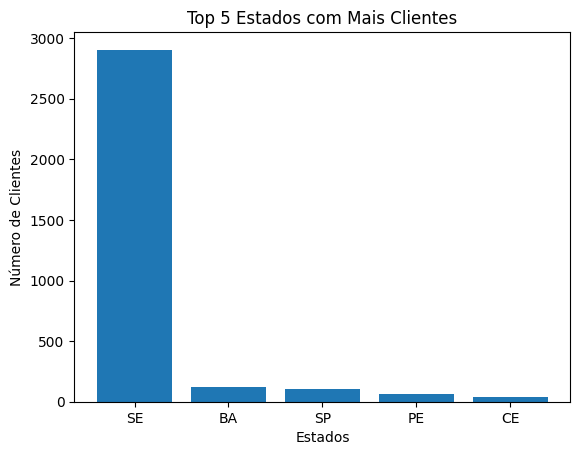

In [71]:
top_estados = tabela_clientes['Estado'].value_counts().head(5)
plt.bar(top_estados.index, top_estados.values)
plt.title('Top 5 Estados com Mais Clientes')
plt.xlabel('Estados')
plt.ylabel('Número de Clientes')
plt.show()


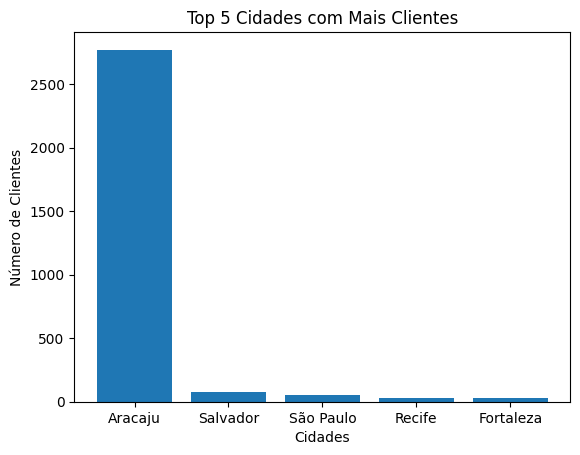

In [72]:
top_cidades = tabela_clientes['Cidade'].value_counts().head(5)
plt.bar(top_cidades.index, top_cidades.values)
plt.title('Top 5 Cidades com Mais Clientes')
plt.xlabel('Cidades')
plt.ylabel('Número de Clientes')
plt.show()


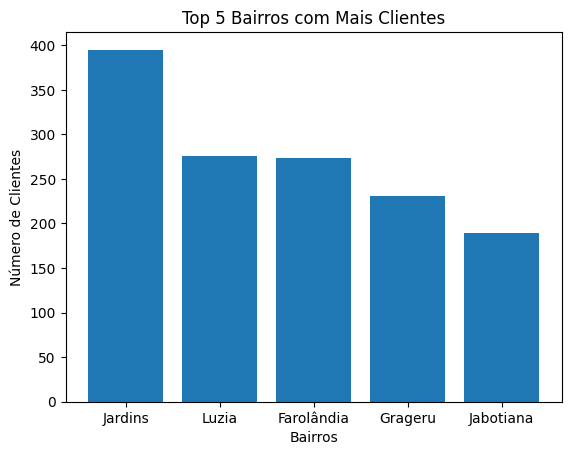

In [73]:
top_bairros = tabela_clientes['Bairro'].value_counts().head(5)
plt.bar(top_bairros.index, top_bairros.values)
plt.title('Top 5 Bairros com Mais Clientes')
plt.xlabel('Bairros')
plt.ylabel('Número de Clientes')
plt.show()


## Essa foi uma etapa de verificação fiz um script para ver se os clientes compraram em datas diferentes e quais foram essas datas, com intuito de verificar a recorrencia das compras de cada um deles, essa informação serviu apenas como base para ter uma ideia de como estruturar o modelo

# Calculando a Frequencia do Dataframe

In [7]:
# Contar quantas compras cada cliente fez
compras_por_cliente = tabela_vendas_produtos['ID_Cliente'].value_counts()

# Selecionar os 100 clientes com mais compras
top_100_ids = compras_por_cliente.head(100).index.tolist()

In [8]:
# Agrupar as compras por cliente e calcular a quantidade de dias únicos em que ele comprou
compras_por_cliente = tabela_vendas_produtos.groupby('ID_Cliente')['Data'].nunique()

# Selecionar apenas os clientes que compraram em mais de um dia
clientes_compras_multiplos_dias = compras_por_cliente[compras_por_cliente > 1]
print(clientes_compras_multiplos_dias)


ID_Cliente
1.226840e+10    43
1.237870e+10     2
1.238221e+10     2
1.238334e+10     3
1.238377e+10    12
                ..
1.598450e+10     2
1.598478e+10     2
1.598494e+10     3
1.598628e+10     2
1.598827e+10     2
Name: Data, Length: 1565, dtype: int64


## Feita a anlálise anterior resolvi calcular os clientes que tinham uma frequencia de compra maiores ou iguais a 10 dias assim, poderia ter uma ideia dos possiveis clientes que tem uma "Fidelização" com a loja

In [9]:
df_freq = tabela_vendas_produtos.groupby('ID_Cliente')['Data'].nunique().reset_index(name='Freq_Compra')
df_top_freq = df_freq[df_freq['Freq_Compra'] >= 10]
print(df_top_freq)


        ID_Cliente  Freq_Compra
16    1.226840e+10           43
21    1.238377e+10           12
23    1.238509e+10           10
26    1.242904e+10           22
32    1.242915e+10           15
...            ...          ...
1851  1.580584e+10           14
1859  1.580671e+10           10
1941  1.581689e+10           15
1972  1.582084e+10           11
2192  1.585883e+10           12

[73 rows x 2 columns]


## Para melhor visualização fiz uma colunas de datas para melhor ver o padrão 

In [10]:
df_top_freq_dates = pd.merge(df_top_freq, tabela_vendas_produtos[['ID_Cliente', 'Data']], on='ID_Cliente', how='left')
print(df_top_freq_dates)


        ID_Cliente  Freq_Compra        Data
0     1.226840e+10           43  2021-10-23
1     1.226840e+10           43  2021-10-23
2     1.226840e+10           43  2021-10-23
3     1.226840e+10           43  2021-10-23
4     1.226840e+10           43  2021-12-28
...            ...          ...         ...
2031  1.585883e+10           12  2022-11-23
2032  1.585883e+10           12  2022-12-24
2033  1.585883e+10           12  2022-12-24
2034  1.585883e+10           12  2022-12-24
2035  1.585883e+10           12  2022-12-24

[2036 rows x 3 columns]


## Essa etapa fiz um agrupamento entre frequencia e o total gasto de cada cliente na loja, serve como estratégia para um possivel marketing direcionado para alguns clientes

In [11]:
df_total_gasto = tabela_vendas_produtos.groupby('ID_Cliente')['Total_do_Pedido'].sum().reset_index(name='Total_Gasto')
df_freq_total = pd.merge(df_freq, df_total_gasto, on='ID_Cliente', how='left')
df_freq_total_top = df_freq_total[df_freq_total['Freq_Compra'] >= 10]
print(df_freq_total_top)



        ID_Cliente  Freq_Compra  Total_Gasto
16    1.226840e+10           43     23123.30
21    1.238377e+10           12      5303.73
23    1.238509e+10           10      7122.57
26    1.242904e+10           22      7971.50
32    1.242915e+10           15     14777.40
...            ...          ...          ...
1851  1.580584e+10           14      4292.00
1859  1.580671e+10           10      4264.00
1941  1.581689e+10           15      5471.20
1972  1.582084e+10           11      2727.00
2192  1.585883e+10           12      4122.00

[73 rows x 3 columns]


## Com base no agrupamento de cima fiz um gráfico de dispersão relacionando a soma do total gasto de cada cliente com a frequencia de compra para melhor visualização

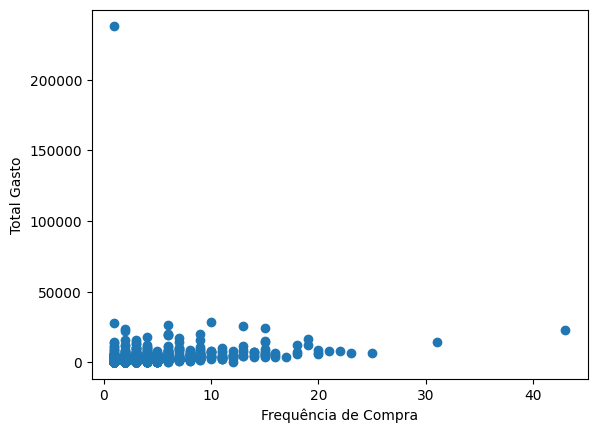

In [12]:
plt.scatter(df_freq_total['Freq_Compra'], df_freq_total['Total_Gasto'])
plt.xlabel('Frequência de Compra')
plt.ylabel('Total Gasto')
plt.show()

## Utilizei a correlação de pearson para ver se a frequência tem uma boa correlação com o total gasto, houve uma correlação positiva moderada isso implica que clientes que compram com maior frequência tendem a gastar mais dinheiro na loja.

In [13]:
from scipy.stats import pearsonr

corr, p_value = pearsonr(df_freq_total['Freq_Compra'], df_freq_total['Total_Gasto'])
print(f'Coeficiente de correlação: {corr:.3f}')


Coeficiente de correlação: 0.288


In [14]:
df_freq_total[['Freq_Compra', 'Total_Gasto']].corr()


,Freq_Compra,Total_Gasto
Freq_Compra,1.000000,0.288344
Total_Gasto,0.288344,1.000000


## Depois de ter feito a analise, utilizei a base de dados dos dados demográficos para ter uma ideia de onde são esses clientes, se são de regiões proximas da loja, me serviu para ter uma ideia se esses clientes compram mais porque está mais próximo ou gostam realmente da marca

In [15]:
df_merged = pd.merge(df_top_freq, tabela_clientes, on='ID_Cliente', how='left')
display(df_merged)


,ID_Cliente,Freq_Compra,Bairro,Cidade,Estado
0,1.226840e+10,43,Luzia,Aracaju,SE
1,1.238377e+10,12,Siqueira Campos,Aracaju,SE
2,1.238509e+10,10,Robalo,Aracaju,SE
3,1.242904e+10,22,Jardins,Aracaju,SE
4,1.242915e+10,15,Atalaia,Aracaju,SE
...,...,...,...,...,...
68,1.580584e+10,14,Suíssa,Aracaju,SE
69,1.580671e+10,10,Jardins,Aracaju,SE
70,1.581689e+10,15,Farolândia,Aracaju,SE
71,1.582084e+10,11,Industrial,Aracaju,SE


## Aprofundei mais a ideia da frequencia e verifiquei quais clientes gastaram com frete ou seja pelos valores encontrados os clientes que tiveram uma frequência de compra maiores ou iguais a 10 e gastou com frete tem uma possibilidade de recomprar, essa informação serve como uma possivel feature para o modelo

In [16]:
df_merged = pd.merge(df_top_freq, tabela_clientes, on='ID_Cliente', how='left')
df_merged = pd.merge(df_merged, tabela_vendas_produtos[['ID_Cliente', 'Frete']], on='ID_Cliente', how='left')
df_merged['Frete'].fillna(0, inplace=True)
df_merged['Gastou_com_Frete'] = np.where(df_merged['Frete'] > 0, 1, 0)
df_merged_gastou_frete = df_merged[df_merged['Gastou_com_Frete'] == 1]
display(df_merged_gastou_frete)


,ID_Cliente,Freq_Compra,Bairro,Cidade,Estado,Frete,Gastou_com_Frete
86,1.238377e+10,12,Siqueira Campos,Aracaju,SE,5.00,1
87,1.238377e+10,12,Siqueira Campos,Aracaju,SE,5.00,1
88,1.238377e+10,12,Siqueira Campos,Aracaju,SE,5.00,1
93,1.238377e+10,12,Siqueira Campos,Aracaju,SE,5.00,1
96,1.238377e+10,12,Siqueira Campos,Aracaju,SE,0.01,1
...,...,...,...,...,...,...,...
1740,1.575571e+10,13,Atalaia,Aracaju,SE,0.01,1
1741,1.575571e+10,13,Atalaia,Aracaju,SE,0.01,1
1804,1.576201e+10,18,Robalo,Aracaju,SE,0.01,1
1957,1.580671e+10,10,Jardins,Aracaju,SE,0.01,1


### Essa parte foi mais em questão de curiosidade para ver qual foi o gasto médio dos clientes dos clientes com frequencia maior ou igual a 10 e menor e igual a 10

In [17]:
# Selecionando clientes com frequência maior ou igual a 10
df_top_freq_total = df_freq_total[df_freq_total['Freq_Compra'] >= 10]

# Selecionando clientes com frequência menor que 10
df_low_freq_total = df_freq_total[df_freq_total['Freq_Compra'] < 10]

# Calculando a média dos gastos totais de cada grupo
mean_top_freq_total = df_top_freq_total['Total_Gasto'].mean()
mean_low_freq_total = df_low_freq_total['Total_Gasto'].mean()

# Imprimindo as médias dos gastos totais de cada grupo
print('Média dos gastos totais dos clientes com frequência maior ou igual a 10: {:.2f}'.format(mean_top_freq_total))
print('Média dos gastos totais dos clientes com frequência menor que 10: {:.2f}'.format(mean_low_freq_total))


Média dos gastos totais dos clientes com frequência maior ou igual a 10: 7464.13
Média dos gastos totais dos clientes com frequência menor que 10: 1308.82


## Essa etapa eu executei dois modelos, o primeiro modelo foi com base no valor listei os 100 possiveis clientes que mais gastaram, e o segundo modelo parte da ideia que clientes com maiores frequências tendem a ter a maior possibilidade de retorno, fiz dois modelos para ter uma análise comparativa e vê qual modelo faz mais sentido para um possivel plano de ação

## Aqui foi executado os filtros dos dados das duas ultimas semanas e logo em seguida agrupei os dados do id e a soma total dos pedidos para cada cliente, depois os resultados foram postos em ordem decrescente e por fim selecionei os possiveis 100 primeiros clientes da lista


In [18]:
# Converte a coluna de data para o formato datetime
tabela_vendas_produtos['Data'] = pd.to_datetime(tabela_vendas_produtos['Data'])


In [19]:
# Filtra os dados para as últimas duas semanas
ultimas_duas_semanas = tabela_vendas_produtos['Data'] >= (tabela_vendas_produtos['Data'].max() - dt.timedelta(days=14))
df_periodo = tabela_vendas_produtos[ultimas_duas_semanas]

In [20]:
# Agrupa os dados por ID_Cliente e calcula a soma do Total_do_Pedido para cada cliente
clientes = df_periodo.groupby('ID_Cliente').sum()['Total_do_Pedido']

<ipython-input-20-182a9238dc40>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  clientes = df_periodo.groupby('ID_Cliente').sum()['Total_do_Pedido']


In [21]:
# Ordena os resultados em ordem decrescente com base no valor total do pedido
clientes_ordenados = clientes.sort_values(ascending=False)


In [22]:
# Seleciona os 100 primeiros clientes da lista classificada
top_100_clientes = clientes_ordenados.head(100)
print(top_100_clientes)

## Aqui inicia o modelo  de floresta aleatória (Random Forest) é um conjunto de árvores de decisão que são treinadas em subconjuntos aleatórios dos dados de treinamento, o modelo levou em consideração 'Quantidade', 'Preço_Unitário', 'Desconto', 'Frete' e gerou uma possivel lista de clientes que fariam a recompra

In [24]:
clientes_recompra = df_periodo.groupby('ID_Cliente').apply(lambda x: 1 if x.shape[0] > 1 else 0)
clientes_recompra = clientes_recompra.rename('recompra')
display(clientes_recompra)

ID_Cliente
1.226840e+10    1
1.242904e+10    1
1.242905e+10    0
1.242917e+10    0
1.242925e+10    1
               ..
1.599063e+10    1
1.599064e+10    1
1.599065e+10    1
1.599067e+10    0
1.599067e+10    1
Name: recompra, Length: 918, dtype: int64

In [25]:
# Juntar variável alvo com os dados de vendas
df_periodo = df_periodo.merge(clientes_recompra, on='ID_Cliente', how='left')

In [26]:
# Selecionar as colunas relevantes para o modelo
X = df_periodo[['Quantidade', 'Preço_Unitário', 'Desconto', 'Frete']]
y = df_periodo['recompra']

In [27]:
# Dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [28]:
# Treinar modelo
modelo = RandomForestClassifier(random_state=42)
modelo.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [29]:
# Fazer previsões no conjunto de teste
predicoes = modelo.predict(X_test)

## O modelo gerou uma acurácia de 81% Ela representa a proporção de previsões corretas em relação ao total de previsões

In [30]:
# Avaliar a acurácia do modelo
acuracia = accuracy_score(y_test, predicoes)
print('Acurácia do modelo:', acuracia)

Acurácia do modelo: 0.8126009693053312


## Depois fui verificar desses 100 clientes que o modelo registrou qual seria a possibilidade desses clientes irem comprar novamente, lembrando que o modelo utilizou valores Quantidade', 'Preço_Unitário', 'Desconto', 'Frete' como base ou seja quanto os clientes gastaram e com base nisso fez a possivel recompra

In [31]:
# Selecionar os dados dos top 100 clientes da lista classificada
top_100_clientes_data = df_periodo[df_periodo['ID_Cliente'].isin(top_100_clientes.index)]

In [32]:
# Selecionar as colunas relevantes para a previsão de recompra
X_top_100 = top_100_clientes_data[['Quantidade', 'Preço_Unitário', 'Desconto', 'Frete']]

In [33]:
# Fazer a previsão de recompra para os top 100 clientes
predicoes_top_100 = modelo.predict(X_top_100)

In [34]:
# Adicionar as previsões à lista dos top 100 clientes
top_100_clientes_data['recompra_predita'] = predicoes_top_100
display(top_100_clientes_data)

<ipython-input-34-96281d038ea6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_100_clientes_data['recompra_predita'] = predicoes_top_100


,ID_Cliente,Data,ID_Produto,Descrição_Produto,Quantidade,Preço_Unitário,ID_Pedido,Desconto,Frete,Total_do_Pedido,recompra,recompra_predita
28,1.597749e+10,2022-12-17,281.0,Bázica Gola C - Grafite - Air - GG,1,119.0,7851,59.5,0.0,535.5,1,1
29,1.597749e+10,2022-12-17,34.0,Bázica Gola C - Verde Militar - Air - GG,1,119.0,7851,59.5,0.0,535.5,1,1
30,1.597749e+10,2022-12-17,76.0,Bázica Gola C - Bordô - Air - GG,1,119.0,7851,59.5,0.0,535.5,1,1
31,1.597749e+10,2022-12-17,82.0,Bázica Gola C - Salmon - Air - GG,1,119.0,7851,59.5,0.0,535.5,1,1
32,1.597749e+10,2022-12-17,11.0,Bázica Gola C - Branca - Powerful - XGG,1,119.0,7851,59.5,0.0,535.5,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
2002,1.599055e+10,2022-12-31,280.0,Bázica Gola C - Grafite - Air - G,1,119.0,8978,0.0,0.0,238.0,1,1
2008,1.599055e+10,2022-12-31,57.0,Bázica Gola C - Branca - Air - G,1,119.0,8983,0.0,0.0,238.0,1,1
2009,1.599055e+10,2022-12-31,280.0,Bázica Gola C - Grafite - Air - G,1,119.0,8983,0.0,0.0,238.0,1,1
2042,1.598494e+10,2022-12-31,211.0,Bázica Lord - Branca - Pima - GG,1,247.0,9006,0.0,0.0,247.0,1,1


### Foi obtido o seguinte resultado A proporção de clientes que realizarão a recompra dentre os top 100 clientes é de 99.66%


In [35]:
proporcao_recompra = sum(predicoes_top_100) / len(predicoes_top_100)
print(f"A proporção de clientes que realizarão a recompra dentre os top 100 clientes é de {proporcao_recompra:.2%}")

A proporção de clientes que realizarão a recompra dentre os top 100 clientes é de 99.66%


In [36]:
clientes_ordenados = top_100_clientes_data.sort_values('recompra_predita', ascending=False)

In [37]:
display(clientes_ordenados)

,ID_Cliente,Data,ID_Produto,Descrição_Produto,Quantidade,Preço_Unitário,ID_Pedido,Desconto,Frete,Total_do_Pedido,recompra,recompra_predita
28,1.597749e+10,2022-12-17,281.0,Bázica Gola C - Grafite - Air - GG,1,119.0,7851,59.5,0.0,535.5,1,1
1205,1.598475e+10,2022-12-24,462.0,Bázica Long - Ocean - Air - GG,1,119.0,8521,0.0,0.0,476.0,1,1
1285,1.560540e+10,2022-12-24,405.0,Bázica Polo - Preta - Pima - XGG,1,257.0,8569,0.0,0.0,495.0,1,1
1287,1.560540e+10,2022-12-24,209.0,Bázica Lord - Branca - Pima - M,1,247.0,8571,0.0,0.0,623.0,1,1
1288,1.560540e+10,2022-12-24,84.0,Bázica Gola C - Salmon - Air - XXGG,1,119.0,8571,0.0,0.0,623.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
692,1.592178e+10,2022-12-22,435.0,Bázica Gola C - Toffee - Air - G,1,119.0,8222,0.0,0.0,476.0,1,1
693,1.592178e+10,2022-12-22,34.0,Bázica Gola C - Verde Militar - Air - GG,1,119.0,8222,0.0,0.0,476.0,1,1
2060,1.226840e+10,2022-12-31,211.0,Bázica Lord - Branca - Pima - GG,1,247.0,9019,0.0,0.0,247.0,1,1
324,1.598105e+10,2022-12-20,2.0,Bázica Gola C - Preta - Powerful - M,1,119.0,8016,11.9,0.0,107.1,1,0


### Assim, listei os 100 possíveis clientes que mais possiveis de fazer a recompra nas proximas duas semanas

In [ ]:
top_100_clientes_ids = clientes_ordenados.index[:100]

# Exibir a lista dos top 100 clientes ordenados pela probabilidade de recompra predita
print("Lista dos top 100 clientes mais prováveis de fazer uma recompra nas próximas duas semanas:")
for cliente_id in top_100_clientes_ids:
    print(cliente_id)


In [39]:
top_100_clientes = clientes_ordenados.loc[top_100_clientes_ids, :]
display(top_100_clientes)


,ID_Cliente,Data,ID_Produto,Descrição_Produto,Quantidade,Preço_Unitário,ID_Pedido,Desconto,Frete,Total_do_Pedido,recompra,recompra_predita
28,1.597749e+10,2022-12-17,281.0,Bázica Gola C - Grafite - Air - GG,1,119.0,7851,59.5,0.0,535.5,1,1
1205,1.598475e+10,2022-12-24,462.0,Bázica Long - Ocean - Air - GG,1,119.0,8521,0.0,0.0,476.0,1,1
1285,1.560540e+10,2022-12-24,405.0,Bázica Polo - Preta - Pima - XGG,1,257.0,8569,0.0,0.0,495.0,1,1
1287,1.560540e+10,2022-12-24,209.0,Bázica Lord - Branca - Pima - M,1,247.0,8571,0.0,0.0,623.0,1,1
1288,1.560540e+10,2022-12-24,84.0,Bázica Gola C - Salmon - Air - XXGG,1,119.0,8571,0.0,0.0,623.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
927,1.598429e+10,2022-12-23,55.0,Bázica Gola C - Branca - Air - P,1,119.0,8366,0.0,0.0,1071.0,1,1
928,1.598429e+10,2022-12-23,73.0,Bázica Gola C - Bordô - Air - P,1,119.0,8366,0.0,0.0,1071.0,1,1
929,1.598429e+10,2022-12-23,163.0,Bázica Gola C - Bali - Air - P,1,119.0,8366,0.0,0.0,1071.0,1,1
930,1.598429e+10,2022-12-23,31.0,Bázica Gola C - Verde Militar - Air - P,1,119.0,8366,0.0,0.0,1071.0,1,1


### Agrupei os clientes com base nos valores gastos e fiz um intervalo, entre  ate 400R$, 400 - 800, mais de 800. O intuito desse agrupamento é foi separar os clientes pelas compras a fim de identificar onde direcionar campanhas de marketing, essa parte será mais detalhada no relatório


In [40]:

top_100_clientes['Total_do_Pedido'].groupby(top_100_clientes['ID_Cliente']).mean()


ID_Cliente
1.226840e+10     309.40
1.248850e+10     503.00
1.327263e+10     476.00
1.486010e+10     915.00
1.503555e+10     381.00
1.508553e+10     595.00
1.556073e+10     595.00
1.560540e+10     559.00
1.574424e+10    1098.00
1.581283e+10     238.00
1.597749e+10     535.50
1.597850e+10     119.00
1.598072e+10     346.00
1.598116e+10     119.00
1.598368e+10     485.00
1.598429e+10    1071.00
1.598438e+10     476.00
1.598450e+10     454.00
1.598475e+10     476.00
1.598482e+10     476.00
1.598488e+10     418.88
1.598494e+10     238.00
1.598496e+10     837.00
1.598583e+10     722.70
1.598600e+10     573.00
Name: Total_do_Pedido, dtype: float64

In [41]:
top_100_clientes['Categoria'] = pd.cut(top_100_clientes['Total_do_Pedido'], bins=[0, 400, 800, np.inf], labels=['Até R$ 400', 'De R$ 400 a R$ 800', 'Acima de R$ 800'])
display(top_100_clientes)

,ID_Cliente,Data,ID_Produto,Descrição_Produto,Quantidade,Preço_Unitário,ID_Pedido,Desconto,Frete,Total_do_Pedido,recompra,recompra_predita,Categoria
28,1.597749e+10,2022-12-17,281.0,Bázica Gola C - Grafite - Air - GG,1,119.0,7851,59.5,0.0,535.5,1,1,De R$ 400 a R$ 800
1205,1.598475e+10,2022-12-24,462.0,Bázica Long - Ocean - Air - GG,1,119.0,8521,0.0,0.0,476.0,1,1,De R$ 400 a R$ 800
1285,1.560540e+10,2022-12-24,405.0,Bázica Polo - Preta - Pima - XGG,1,257.0,8569,0.0,0.0,495.0,1,1,De R$ 400 a R$ 800
1287,1.560540e+10,2022-12-24,209.0,Bázica Lord - Branca - Pima - M,1,247.0,8571,0.0,0.0,623.0,1,1,De R$ 400 a R$ 800
1288,1.560540e+10,2022-12-24,84.0,Bázica Gola C - Salmon - Air - XXGG,1,119.0,8571,0.0,0.0,623.0,1,1,De R$ 400 a R$ 800
...,...,...,...,...,...,...,...,...,...,...,...,...,...
927,1.598429e+10,2022-12-23,55.0,Bázica Gola C - Branca - Air - P,1,119.0,8366,0.0,0.0,1071.0,1,1,Acima de R$ 800
928,1.598429e+10,2022-12-23,73.0,Bázica Gola C - Bordô - Air - P,1,119.0,8366,0.0,0.0,1071.0,1,1,Acima de R$ 800
929,1.598429e+10,2022-12-23,163.0,Bázica Gola C - Bali - Air - P,1,119.0,8366,0.0,0.0,1071.0,1,1,Acima de R$ 800
930,1.598429e+10,2022-12-23,31.0,Bázica Gola C - Verde Militar - Air - P,1,119.0,8366,0.0,0.0,1071.0,1,1,Acima de R$ 800


# Separei as catégorias para ter uma ideia mais visual das quantidades de pessoas e plotei um grafico para ficar mais visual

In [42]:
categorias = top_100_clientes['Categoria'].value_counts(sort=True, ascending=True)
print(categorias)

Até R$ 400            14
Acima de R$ 800       27
De R$ 400 a R$ 800    59
Name: Categoria, dtype: int64


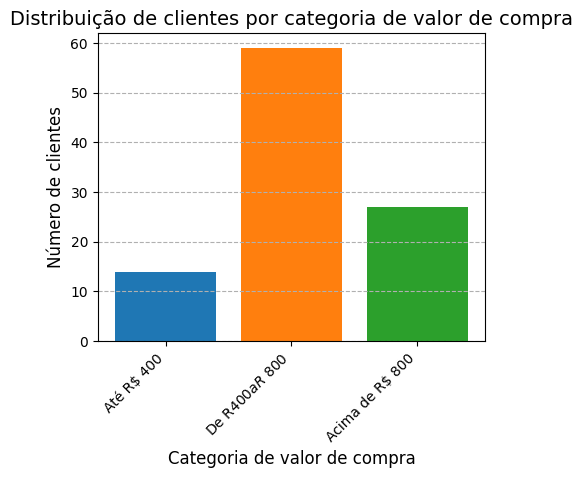

In [43]:
count_categoria = top_100_clientes['Categoria'].value_counts().sort_index()
plt.figure(figsize=(5, 4))
plt.bar(count_categoria.index, count_categoria.values, color=['#1f77b4', '#ff7f0e', '#2ca02c'])
plt.title('Distribuição de clientes por categoria de valor de compra', fontsize=14)
plt.xlabel('Categoria de valor de compra', fontsize=12)
plt.ylabel('Número de clientes', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--')
plt.show()


## Aqui fiz o modelo baseado na frequência e utilizei a regressão linear como base no modelo, foi um modelo mais simples que chegou em um bom resultado e listou os 100 possíveis clientes que irão fazer a recompra com base na frequência e no total gasto por cada um

In [44]:
from sklearn.linear_model import LinearRegression

# Separando os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(df_freq_total['Freq_Compra'], df_freq_total['Total_Gasto'], test_size=0.2, random_state=42)

# Ajustando um modelo de regressão linear simples
model = LinearRegression()
model.fit(X_train.values.reshape(-1, 1), y_train)

# Avaliando o desempenho do modelo no conjunto de teste
score = model.score(X_test.values.reshape(-1, 1), y_test)
print(f'R2 score: {score:.3f}')


R2 score: 0.336


In [45]:

pd.set_option('display.max_rows', None)
mediana_freq = df_freq_total['Freq_Compra'].median()
df_freq_total['Recompra'] = df_freq_total['Freq_Compra'].apply(lambda x: 1 if x >= mediana_freq else 0)
df_top_100 = df_freq_total[df_freq_total['Recompra'] == 1].sort_values(by='Freq_Compra', ascending=False).head(100)
display(df_top_100)


,ID_Cliente,Freq_Compra,Total_Gasto,Recompra
16,1.226840e+10,43,23123.30,1
235,1.408880e+10,31,14518.80,1
88,1.273229e+10,25,6543.03,1
1171,1.569230e+10,23,6556.00,1
26,1.242904e+10,22,7971.50,1
1032,1.566235e+10,21,8295.40,1
309,1.446321e+10,20,9085.00,1
1776,1.578848e+10,20,6527.98,1
36,1.242935e+10,20,6177.00,1
954,1.562501e+10,19,16566.92,1


## Testando o Modelo


In [46]:
freq_acertos = sum(df_freq_total['Recompra'] == 1)
aleatorio_esperado = len(df_freq_total) * 0.5

#### Esse código calcula o p-valor de um teste de hipótese binomial para verificar se a proporção de acertos em uma amostra é estatisticamente significativa. O argumento freq_acertos representa o número de sucessos na amostra, len(df_freq_total) é o tamanho da amostra e p=0.5 representa a probabilidade de sucesso esperada. O argumento alternative='greater' indica que estamos interessados em verificar se a proporção de acertos é significativamente maior do que a proporção esperado

In [47]:
from scipy.stats import binom_test
p_valor = binom_test(freq_acertos, n=len(df_freq_total), p=0.5, alternative='greater')

<ipython-input-47-5f547e64ff6b>:2: DeprecationWarning: 'binom_test' is deprecated in favour of 'binomtest' from version 1.7.0 and will be removed in Scipy 1.12.0.
  p_valor = binom_test(freq_acertos, n=len(df_freq_total), p=0.5, alternative='greater')


## Portanto, podemos rejeitar a hipótese nula com um alto grau de confiança e afirmar que o modelo baseado na frequência é melhor do que as previsões aleatórias.

In [48]:
print(p_valor)

0.0
